In [1]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits

In [2]:
spec = fits.open('BYDra/0162.lspm3642.ms.fits')

In [3]:
spec[0].header

 [astropy.io.fits.verify]


SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    3 / Number of axes                                 
NAXIS1  =                 2681 / Axis length                                    
NAXIS2  =                    1 / Axis length                                    
NAXIS3  =                    4 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
IRAF-TLM= '2016-05-24T16:48:42' / Time of last modification                     
OBJECT  = 'lspm3642'           / OBJECT NAME                                    
NAMPS   =                    1                                                  
DATE    = '2016-05-24T16:47:19' / UT date/time at start                         
DATE-OBS= '2011-05-09       

In [4]:
print(spec[0].data.shape)

print(spec[0].data)

# CTYPE1  = 'LINEAR  '                                                            
# CTYPE2  = 'LINEAR  '                                                            
# CRVAL1  =      5575.4462890625                                                  
# CRPIX1  =                   1.                                                  
# CD1_1   =    0.749065518379211                                                  
# CD2_2   =                   1.


lam = np.linspace(spec[0].header['CRVAL1'],
                      spec[0].header['CRVAL1'] + ((spec[0].header['NAXIS1']-1) * spec[0].header['CD1_1']),
                      spec[0].header['NAXIS1']) 

print(lam)

(4, 1, 2681)
[[[ 439.06528   527.33826   602.1965   ... 4228.839    4280.45
   4408.16    ]]

 [[ 408.80722   471.6734    610.3819   ... 4226.7676   4280.631
   4406.6675  ]]

 [[ 257.36694   770.47797  1689.2737   ...   23.18565    22.734129
     46.549408]]

 [[  27.648293   34.064217   42.23797  ...   61.636154   62.014984
     63.024704]]]
[5575.44628906 5576.19535458 5576.9444201  ... 7581.44374728 7582.1928128
 7582.94187832]


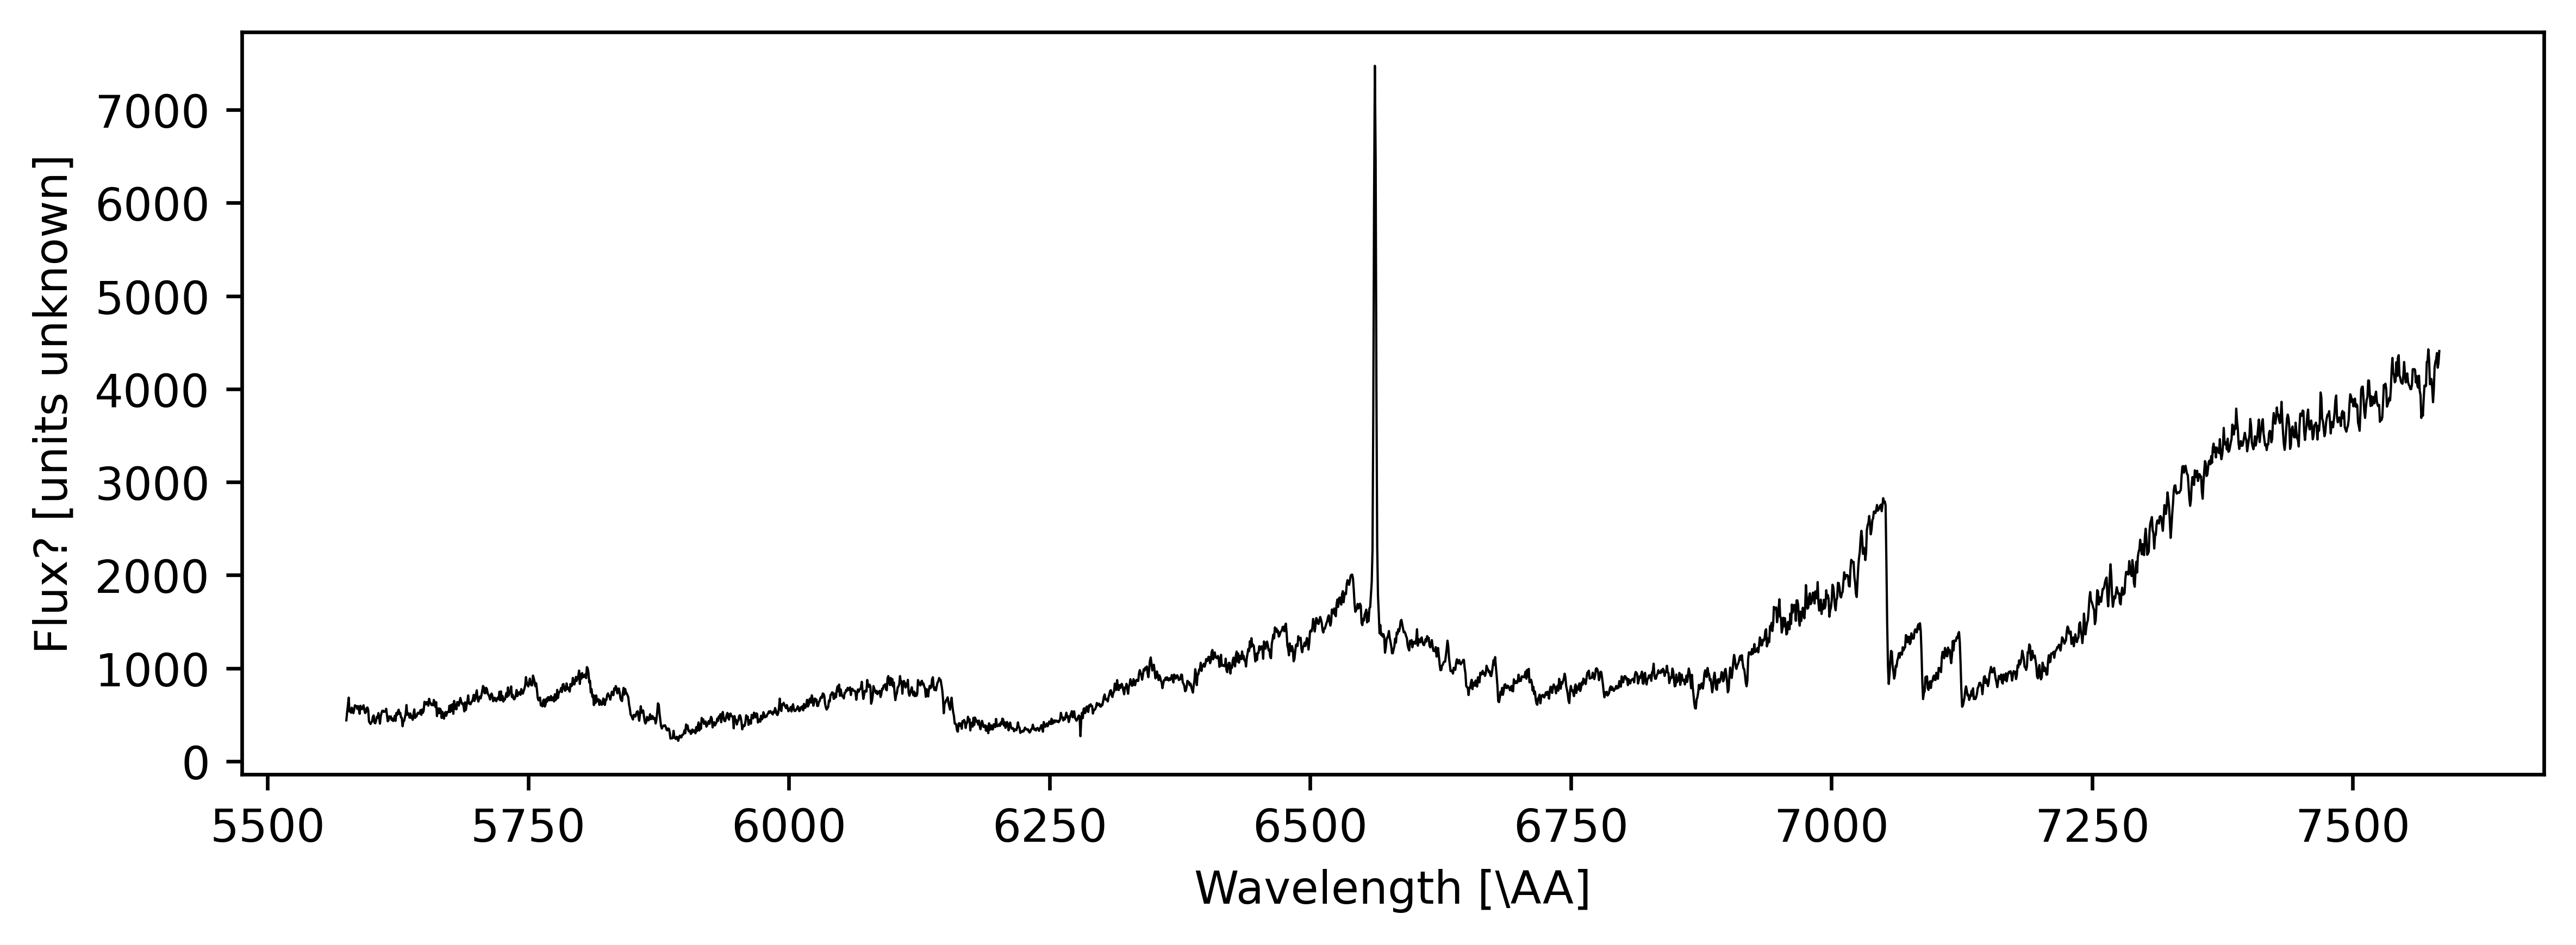

In [7]:
fig = plt.figure(figsize=(8,3), dpi=600)
ax = plt.gca()

ax.plot(lam, spec[0].data[0,0, :], lw=0.5, c='k')

ax.set_xlabel("Wavelength [\AA]")
ax.set_ylabel("Flux? [units unknown]")

plt.tight_layout()
#plt.savefig("0162.lspm3642.ms.pdf", dpi=600)

In [6]:
np.savetxt('BYDra/0162.lspm3642.ms.csv', np.stack((lam, spec[0].data[0,0, :])).T)